# Import the file

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.linear_model import LinearRegression
import pickle

In [2]:
df=pd.read_csv(r"C:\Users\arunb\Downloads\cars24.csv")

In [3]:
df.head(5)

,Unnamed: 0,Brand,Name,Year,Model,Transmission,Kms,Owner,Fuel Type,Registration,EMI(₹),Price(₹),State,Down Payment(₹),Url
0,0,Hyundai,Hyundai i20,2010,MAGNA O 1.2,Manual,34913,2nd Owner,Petrol,MH-02,4489,229599,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-hyundai-i20-20...
1,1,Maruti,Maruti Ritz,2012,VXI,Manual,77919,2nd Owner,Petrol,MH-02,4616,236099,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-maruti-ritz-20...
2,3,Maruti,Maruti Swift,2020,VXI,Manual,25228,1st Owner,Petrol,MH-05,12469,637799,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-maruti-swift-2...
3,4,Maruti,Maruti Swift,2012,VXI,Manual,35757,3rd Owner,Petrol,MH-03,6246,319499,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-maruti-swift-2...
4,5,Maruti,Maruti Swift,2013,VXI,Manual,37591,1st Owner,Petrol,MH-02,8067,412649,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-maruti-swift-2...


In [4]:
df.columns

Index(['Unnamed: 0', 'Brand', 'Name', 'Year', 'Model', 'Transmission', 'Kms',
       'Owner', 'Fuel Type', 'Registration', 'EMI(₹)', 'Price(₹)', 'State',
       'Down Payment(₹)', 'Url'],
      dtype='object')

In [5]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [6]:
df.head(5)

,Brand,Name,Year,Model,Transmission,Kms,Owner,Fuel Type,Registration,EMI(₹),Price(₹),State,Down Payment(₹),Url
0,Hyundai,Hyundai i20,2010,MAGNA O 1.2,Manual,34913,2nd Owner,Petrol,MH-02,4489,229599,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-hyundai-i20-20...
1,Maruti,Maruti Ritz,2012,VXI,Manual,77919,2nd Owner,Petrol,MH-02,4616,236099,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-maruti-ritz-20...
2,Maruti,Maruti Swift,2020,VXI,Manual,25228,1st Owner,Petrol,MH-05,12469,637799,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-maruti-swift-2...
3,Maruti,Maruti Swift,2012,VXI,Manual,35757,3rd Owner,Petrol,MH-03,6246,319499,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-maruti-swift-2...
4,Maruti,Maruti Swift,2013,VXI,Manual,37591,1st Owner,Petrol,MH-02,8067,412649,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-maruti-swift-2...


In [7]:
print(df.shape)

(2883, 14)


# EDA

Checking the Null values

In [8]:
df.isnull().sum()

Brand              0
Name               0
Year               0
Model              0
Transmission       0
Kms                0
Owner              0
Fuel Type          0
Registration       0
EMI(₹)             0
Price(₹)           0
State              0
Down Payment(₹)    0
Url                0
dtype: int64

In [9]:
df['Brand'].unique()

array(['Hyundai', 'Maruti', 'Renault', 'Datsun', 'Honda', 'Toyota',
       'Volkswagen', 'Tata', 'MG', 'Ford', 'Mercedes', 'KIA', 'Skoda',
       'Mahindra', 'Nissan', 'Jeep', 'Jaguar', 'Audi'], dtype=object)

Check the duplicated value

In [10]:
df.duplicated().sum()

0

In [11]:
df['Owner']=df['Owner'].replace({'1st Owner':'1','2nd Owner':'2','3rd Owner':'3'},regex=True)
df

,Brand,Name,Year,Model,Transmission,Kms,Owner,Fuel Type,Registration,EMI(₹),Price(₹),State,Down Payment(₹),Url
0,Hyundai,Hyundai i20,2010,MAGNA O 1.2,Manual,34913,2,Petrol,MH-02,4489,229599,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-hyundai-i20-20...
1,Maruti,Maruti Ritz,2012,VXI,Manual,77919,2,Petrol,MH-02,4616,236099,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-maruti-ritz-20...
2,Maruti,Maruti Swift,2020,VXI,Manual,25228,1,Petrol,MH-05,12469,637799,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-maruti-swift-2...
3,Maruti,Maruti Swift,2012,VXI,Manual,35757,3,Petrol,MH-03,6246,319499,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-maruti-swift-2...
4,Maruti,Maruti Swift,2013,VXI,Manual,37591,1,Petrol,MH-02,8067,412649,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-maruti-swift-2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2878,Hyundai,Hyundai i10,2011,MAGNA 1.2 KAPPA2,Manual,50513,2,Petrol,KA-53,6031,308499,Karnataka,Zero Down Payment,https://www.cars24.com/buy-used-hyundai-i10-20...
2879,Hyundai,Hyundai NEW SANTRO,2021,1.1 ERA EXICUTIVE,Manual,28441,1,Petrol,KA-09,10733,548999,Karnataka,Zero Down Payment,https://www.cars24.com/buy-used-hyundai-new-sa...
2880,KIA,KIA SELTOS,2020,HTX+ AT 1.5 DIESEL,Automatic,44152,1,Diesel,KA-34,35355,1882699,Karnataka,Zero Down Payment,https://www.cars24.com/buy-used-kia-seltos-202...
2881,Ford,Ford Ecosport,2016,1.5 TITANIUM TI VCT AT,Automatic,73304,1,Petrol,KA-51,15925,847999,Karnataka,Zero Down Payment,https://www.cars24.com/buy-used-ford-ecosport-...


In [12]:
df['Owner'].unique()

array(['2', '1', '3'], dtype=object)

In [13]:
df_01=df["Registration"].str.split("-",n=1,expand=True)

In [14]:
df["states"]=df_01[0]

In [15]:
df

,Brand,Name,Year,Model,Transmission,Kms,Owner,Fuel Type,Registration,EMI(₹),Price(₹),State,Down Payment(₹),Url,states
0,Hyundai,Hyundai i20,2010,MAGNA O 1.2,Manual,34913,2,Petrol,MH-02,4489,229599,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-hyundai-i20-20...,MH
1,Maruti,Maruti Ritz,2012,VXI,Manual,77919,2,Petrol,MH-02,4616,236099,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-maruti-ritz-20...,MH
2,Maruti,Maruti Swift,2020,VXI,Manual,25228,1,Petrol,MH-05,12469,637799,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-maruti-swift-2...,MH
3,Maruti,Maruti Swift,2012,VXI,Manual,35757,3,Petrol,MH-03,6246,319499,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-maruti-swift-2...,MH
4,Maruti,Maruti Swift,2013,VXI,Manual,37591,1,Petrol,MH-02,8067,412649,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-maruti-swift-2...,MH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2878,Hyundai,Hyundai i10,2011,MAGNA 1.2 KAPPA2,Manual,50513,2,Petrol,KA-53,6031,308499,Karnataka,Zero Down Payment,https://www.cars24.com/buy-used-hyundai-i10-20...,KA
2879,Hyundai,Hyundai NEW SANTRO,2021,1.1 ERA EXICUTIVE,Manual,28441,1,Petrol,KA-09,10733,548999,Karnataka,Zero Down Payment,https://www.cars24.com/buy-used-hyundai-new-sa...,KA
2880,KIA,KIA SELTOS,2020,HTX+ AT 1.5 DIESEL,Automatic,44152,1,Diesel,KA-34,35355,1882699,Karnataka,Zero Down Payment,https://www.cars24.com/buy-used-kia-seltos-202...,KA
2881,Ford,Ford Ecosport,2016,1.5 TITANIUM TI VCT AT,Automatic,73304,1,Petrol,KA-51,15925,847999,Karnataka,Zero Down Payment,https://www.cars24.com/buy-used-ford-ecosport-...,KA


In [16]:
df['states'].unique()

array(['MH', 'HR', 'DL', 'UP', 'TS', 'AP', 'KA'], dtype=object)

In [17]:
df['states']=df['states'].replace({'TS':'Telangana','AP':'Andhra Pradesh','KA':'Karnataka','HR':'Haryana','MH':'Maharashtra'},regex=True)
df

,Brand,Name,Year,Model,Transmission,Kms,Owner,Fuel Type,Registration,EMI(₹),Price(₹),State,Down Payment(₹),Url,states
0,Hyundai,Hyundai i20,2010,MAGNA O 1.2,Manual,34913,2,Petrol,MH-02,4489,229599,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-hyundai-i20-20...,Maharashtra
1,Maruti,Maruti Ritz,2012,VXI,Manual,77919,2,Petrol,MH-02,4616,236099,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-maruti-ritz-20...,Maharashtra
2,Maruti,Maruti Swift,2020,VXI,Manual,25228,1,Petrol,MH-05,12469,637799,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-maruti-swift-2...,Maharashtra
3,Maruti,Maruti Swift,2012,VXI,Manual,35757,3,Petrol,MH-03,6246,319499,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-maruti-swift-2...,Maharashtra
4,Maruti,Maruti Swift,2013,VXI,Manual,37591,1,Petrol,MH-02,8067,412649,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-maruti-swift-2...,Maharashtra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2878,Hyundai,Hyundai i10,2011,MAGNA 1.2 KAPPA2,Manual,50513,2,Petrol,KA-53,6031,308499,Karnataka,Zero Down Payment,https://www.cars24.com/buy-used-hyundai-i10-20...,Karnataka
2879,Hyundai,Hyundai NEW SANTRO,2021,1.1 ERA EXICUTIVE,Manual,28441,1,Petrol,KA-09,10733,548999,Karnataka,Zero Down Payment,https://www.cars24.com/buy-used-hyundai-new-sa...,Karnataka
2880,KIA,KIA SELTOS,2020,HTX+ AT 1.5 DIESEL,Automatic,44152,1,Diesel,KA-34,35355,1882699,Karnataka,Zero Down Payment,https://www.cars24.com/buy-used-kia-seltos-202...,Karnataka
2881,Ford,Ford Ecosport,2016,1.5 TITANIUM TI VCT AT,Automatic,73304,1,Petrol,KA-51,15925,847999,Karnataka,Zero Down Payment,https://www.cars24.com/buy-used-ford-ecosport-...,Karnataka


In [18]:
df.shape

(2883, 15)

In [19]:
df.dtypes

Brand              object
Name               object
Year                int64
Model              object
Transmission       object
Kms                 int64
Owner              object
Fuel Type          object
Registration       object
EMI(₹)              int64
Price(₹)            int64
State              object
Down Payment(₹)    object
Url                object
states             object
dtype: object

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2883 entries, 0 to 2882
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Brand            2883 non-null   object
 1   Name             2883 non-null   object
 2   Year             2883 non-null   int64 
 3   Model            2883 non-null   object
 4   Transmission     2883 non-null   object
 5   Kms              2883 non-null   int64 
 6   Owner            2883 non-null   object
 7   Fuel Type        2883 non-null   object
 8   Registration     2883 non-null   object
 9   EMI(₹)           2883 non-null   int64 
 10  Price(₹)         2883 non-null   int64 
 11  State            2883 non-null   object
 12  Down Payment(₹)  2883 non-null   object
 13  Url              2883 non-null   object
 14  states           2883 non-null   object
dtypes: int64(4), object(11)
memory usage: 338.0+ KB


In [21]:
df.isnull().sum()

Brand              0
Name               0
Year               0
Model              0
Transmission       0
Kms                0
Owner              0
Fuel Type          0
Registration       0
EMI(₹)             0
Price(₹)           0
State              0
Down Payment(₹)    0
Url                0
states             0
dtype: int64

In [22]:
df.median()

C:\Users\arunb\AppData\Local\Temp/ipykernel_10260/530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


Year          2018.0
Kms          39950.0
Owner            1.0
EMI(₹)       11380.0
Price(₹)    582099.0
dtype: float64

In [23]:
df.skew()

C:\Users\arunb\AppData\Local\Temp/ipykernel_10260/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Year       -0.629226
Kms         1.665684
Owner       1.465421
EMI(₹)      1.520668
Price(₹)    1.544048
dtype: float64

In [24]:
df.kurt()

C:\Users\arunb\AppData\Local\Temp/ipykernel_10260/1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


Year        -0.084857
Kms         19.747161
Owner        1.011941
EMI(₹)       3.526577
Price(₹)     3.440826
dtype: float64

In [25]:
df.describe()

,Year,Kms,EMI(₹),Price(₹)
count,2883.000000,2883.000000,2883.000000,2.883000e+03
mean,2017.284773,42759.710024,12817.074922,6.670642e+05
std,2.716490,26363.573491,6219.225342,3.365281e+05
min,2009.000000,167.000000,2641.000000,1.350990e+05
25%,2016.000000,21131.500000,8452.500000,4.323490e+05
50%,2018.000000,39950.000000,11380.000000,5.820990e+05
75%,2019.000000,60527.000000,15399.500000,8.125990e+05
max,2022.000000,455601.000000,60900.000000,3.242999e+06


# Visualization

Text(0, 0.5, 'NO of Brand')

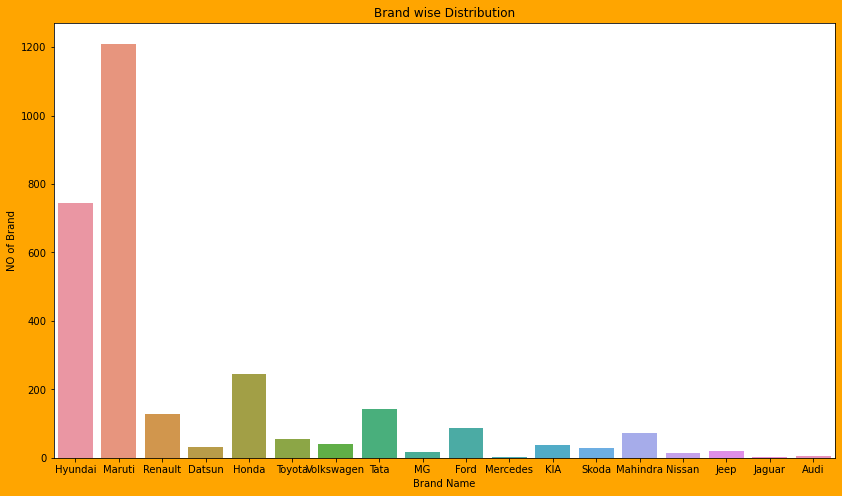

In [26]:
plt.figure(figsize=(14,8),facecolor='orange')
sns.countplot(data=df, x='Brand')
plt.title('Brand wise Distribution')
plt.xlabel('Brand Name')
plt.ylabel('NO of Brand')

Text(0, 0.5, 'NO of cars')

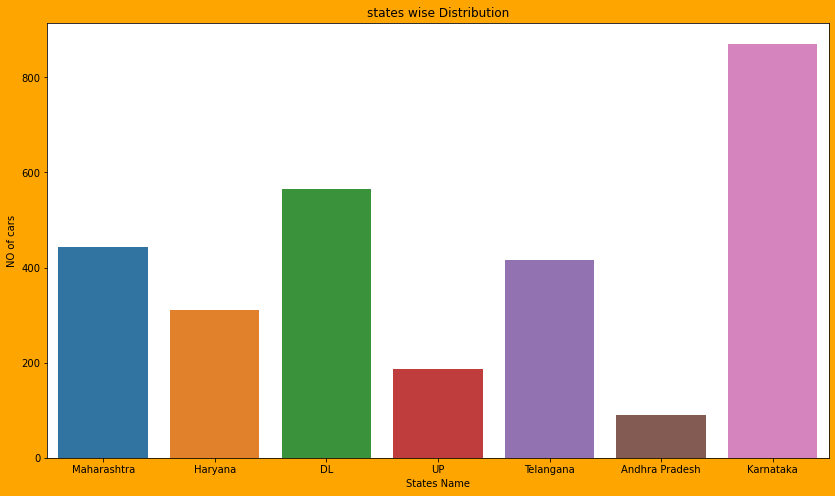

In [27]:
plt.figure( figsize=(14,8),facecolor='Orange')
sns.countplot(data=df,x='states')
plt.title('states wise Distribution')
plt.xlabel('States Name')
plt.ylabel('NO of cars')

Text(0, 0.5, 'NO of car')

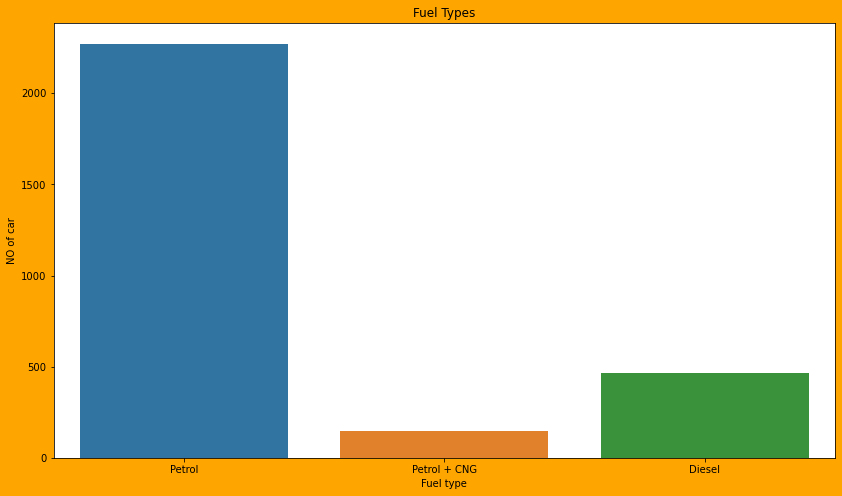

In [28]:
plt.figure(figsize=(14,8),facecolor='orange')
sns.countplot(data=df,x='Fuel Type')
plt.title('Fuel Types')
plt.xlabel('Fuel type')
plt.ylabel('NO of car')


Text(0, 0.5, 'No of car')

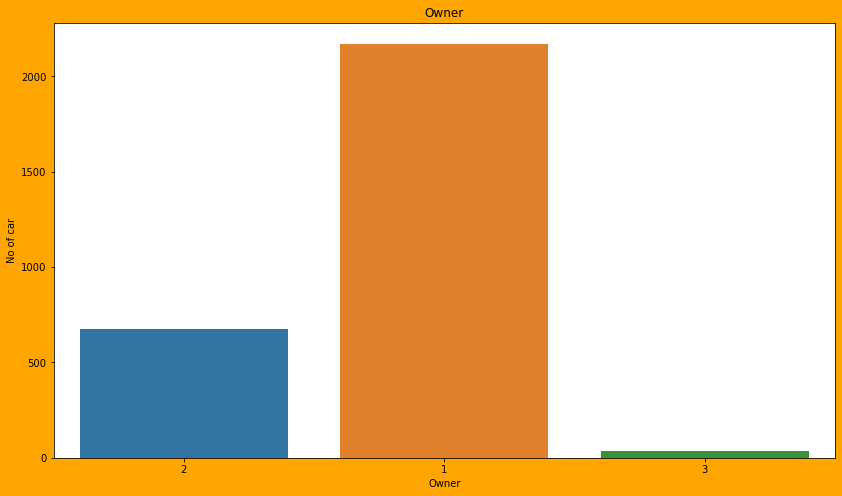

In [29]:
plt.figure(figsize=(14,8), facecolor='orange')
sns.countplot(data=df,x='Owner')
plt.title('Owner')
plt.xlabel('Owner')
plt.ylabel('No of car')

Text(0, 0.5, 'NO of Model')

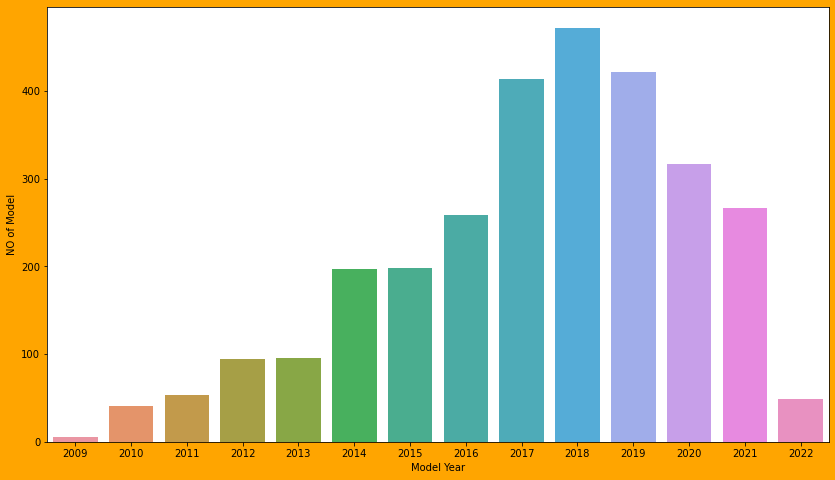

In [30]:
plt.figure(figsize=(14,8),facecolor='orange')
sns.countplot(data=df,x='Year')
plt.xlabel('Model Year')
plt.ylabel('NO of Model')


<AxesSubplot:xlabel='Transmission', ylabel='count'>

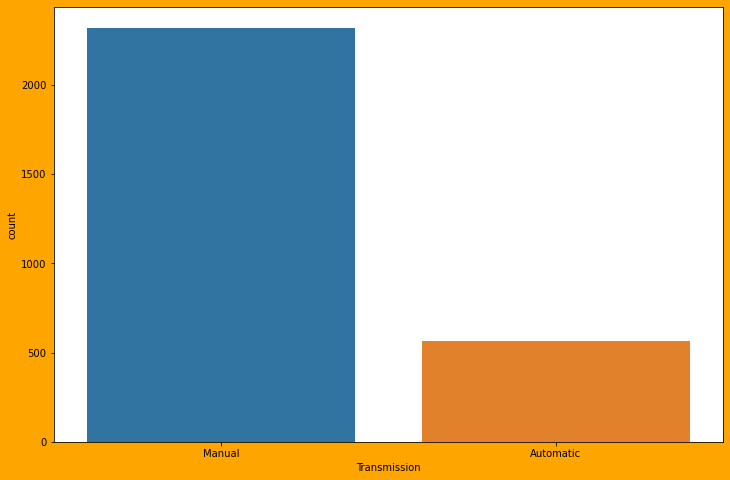

In [31]:
plt.figure( figsize=(12,8),facecolor='Orange')
sns.countplot(data=df,x='Transmission')

Text(0.5, 1.0, 'Top 20 cars')

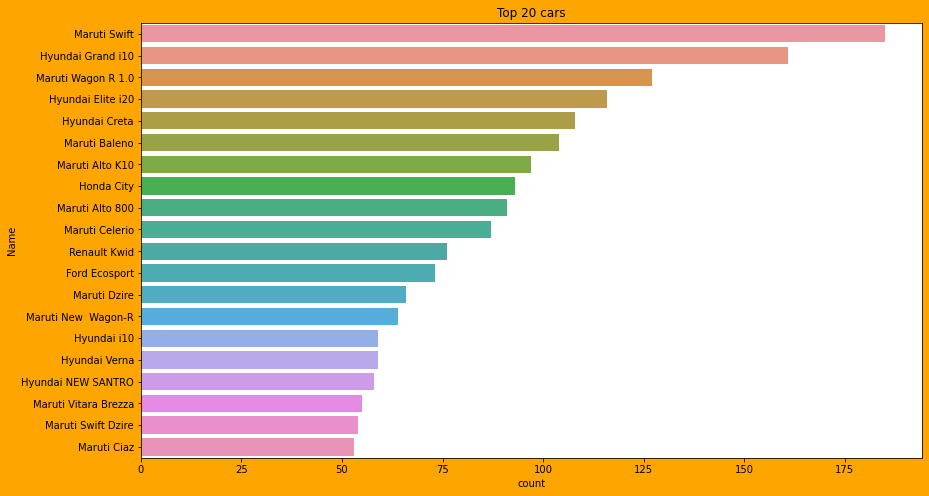

In [32]:
plt.figure(figsize=(14,8),facecolor='orange')
sns.countplot(y='Name',data=df,order=df['Name'].value_counts().index[0:20])
plt.title('Top 20 cars')



C:\Users\arunb\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


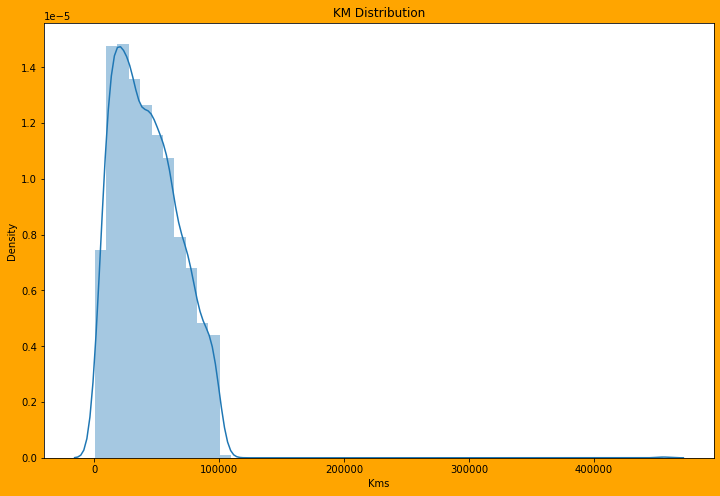

In [33]:
plt.figure(figsize=(12,8),facecolor='orange')
sns.distplot(df['Kms'])
plt.title('KM Distribution')
plt.show()


C:\Users\arunb\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


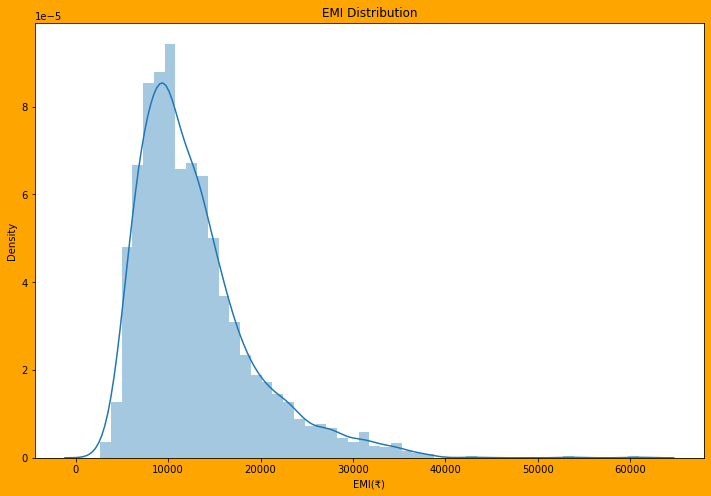

In [34]:
plt.figure(figsize=(12,8),facecolor='orange')
sns.distplot(df['EMI(₹)'])
plt.title('EMI Distribution')
plt.show()

In [35]:
pip install pandas-profiling

In [36]:
import pandas as pd
from pandas_profiling import ProfileReport

In [37]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
df

,Brand,Name,Year,Model,Transmission,Kms,Owner,Fuel Type,Registration,EMI(₹),Price(₹),State,Down Payment(₹),Url,states
0,Hyundai,Hyundai i20,2010,MAGNA O 1.2,Manual,34913,2,Petrol,MH-02,4489,229599,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-hyundai-i20-20...,Maharashtra
1,Maruti,Maruti Ritz,2012,VXI,Manual,77919,2,Petrol,MH-02,4616,236099,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-maruti-ritz-20...,Maharashtra
2,Maruti,Maruti Swift,2020,VXI,Manual,25228,1,Petrol,MH-05,12469,637799,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-maruti-swift-2...,Maharashtra
3,Maruti,Maruti Swift,2012,VXI,Manual,35757,3,Petrol,MH-03,6246,319499,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-maruti-swift-2...,Maharashtra
4,Maruti,Maruti Swift,2013,VXI,Manual,37591,1,Petrol,MH-02,8067,412649,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-maruti-swift-2...,Maharashtra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2878,Hyundai,Hyundai i10,2011,MAGNA 1.2 KAPPA2,Manual,50513,2,Petrol,KA-53,6031,308499,Karnataka,Zero Down Payment,https://www.cars24.com/buy-used-hyundai-i10-20...,Karnataka
2879,Hyundai,Hyundai NEW SANTRO,2021,1.1 ERA EXICUTIVE,Manual,28441,1,Petrol,KA-09,10733,548999,Karnataka,Zero Down Payment,https://www.cars24.com/buy-used-hyundai-new-sa...,Karnataka
2880,KIA,KIA SELTOS,2020,HTX+ AT 1.5 DIESEL,Automatic,44152,1,Diesel,KA-34,35355,1882699,Karnataka,Zero Down Payment,https://www.cars24.com/buy-used-kia-seltos-202...,Karnataka
2881,Ford,Ford Ecosport,2016,1.5 TITANIUM TI VCT AT,Automatic,73304,1,Petrol,KA-51,15925,847999,Karnataka,Zero Down Payment,https://www.cars24.com/buy-used-ford-ecosport-...,Karnataka


In [39]:
lis = list()
lis = df.columns
lis

Index(['Brand', 'Name', 'Year', 'Model', 'Transmission', 'Kms', 'Owner',
       'Fuel Type', 'Registration', 'EMI(₹)', 'Price(₹)', 'State',
       'Down Payment(₹)', 'Url', 'states'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2883 entries, 0 to 2882
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Brand            2883 non-null   object
 1   Name             2883 non-null   object
 2   Year             2883 non-null   int64 
 3   Model            2883 non-null   object
 4   Transmission     2883 non-null   object
 5   Kms              2883 non-null   int64 
 6   Owner            2883 non-null   object
 7   Fuel Type        2883 non-null   object
 8   Registration     2883 non-null   object
 9   EMI(₹)           2883 non-null   int64 
 10  Price(₹)         2883 non-null   int64 
 11  State            2883 non-null   object
 12  Down Payment(₹)  2883 non-null   object
 13  Url              2883 non-null   object
 14  states           2883 non-null   object
dtypes: int64(4), object(11)
memory usage: 338.0+ KB


In [41]:
original = df.copy()
original

,Brand,Name,Year,Model,Transmission,Kms,Owner,Fuel Type,Registration,EMI(₹),Price(₹),State,Down Payment(₹),Url,states
0,Hyundai,Hyundai i20,2010,MAGNA O 1.2,Manual,34913,2,Petrol,MH-02,4489,229599,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-hyundai-i20-20...,Maharashtra
1,Maruti,Maruti Ritz,2012,VXI,Manual,77919,2,Petrol,MH-02,4616,236099,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-maruti-ritz-20...,Maharashtra
2,Maruti,Maruti Swift,2020,VXI,Manual,25228,1,Petrol,MH-05,12469,637799,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-maruti-swift-2...,Maharashtra
3,Maruti,Maruti Swift,2012,VXI,Manual,35757,3,Petrol,MH-03,6246,319499,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-maruti-swift-2...,Maharashtra
4,Maruti,Maruti Swift,2013,VXI,Manual,37591,1,Petrol,MH-02,8067,412649,Maharashtra,Zero Down Payment,https://www.cars24.com/buy-used-maruti-swift-2...,Maharashtra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2878,Hyundai,Hyundai i10,2011,MAGNA 1.2 KAPPA2,Manual,50513,2,Petrol,KA-53,6031,308499,Karnataka,Zero Down Payment,https://www.cars24.com/buy-used-hyundai-i10-20...,Karnataka
2879,Hyundai,Hyundai NEW SANTRO,2021,1.1 ERA EXICUTIVE,Manual,28441,1,Petrol,KA-09,10733,548999,Karnataka,Zero Down Payment,https://www.cars24.com/buy-used-hyundai-new-sa...,Karnataka
2880,KIA,KIA SELTOS,2020,HTX+ AT 1.5 DIESEL,Automatic,44152,1,Diesel,KA-34,35355,1882699,Karnataka,Zero Down Payment,https://www.cars24.com/buy-used-kia-seltos-202...,Karnataka
2881,Ford,Ford Ecosport,2016,1.5 TITANIUM TI VCT AT,Automatic,73304,1,Petrol,KA-51,15925,847999,Karnataka,Zero Down Payment,https://www.cars24.com/buy-used-ford-ecosport-...,Karnataka


In [42]:
label_encoder = LabelEncoder()
for i in df.columns:
    
    if df[i].dtype == object:
        
        df[i] = label_encoder.fit_transform(df[i])
        
df

,Brand,Name,Year,Model,Transmission,Kms,Owner,Fuel Type,Registration,EMI(₹),Price(₹),State,Down Payment(₹),Url,states
0,4,37,2010,314,1,34913,1,1,118,4489,229599,4,0,872,4
1,10,66,2012,462,1,77919,1,1,118,4616,236099,4,0,1879,4
2,10,69,2020,462,1,25228,0,1,121,12469,637799,4,0,2115,4
3,10,69,2012,462,1,35757,2,1,119,6246,319499,4,0,1969,4
4,10,69,2013,462,1,37591,0,1,118,8067,412649,4,0,1980,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2878,4,36,2011,311,1,50513,1,1,110,6031,308499,3,0,820,3
2879,4,29,2021,23,1,28441,0,1,79,10733,548999,3,0,955,3
2880,7,41,2020,273,0,44152,0,0,97,35355,1882699,3,0,1121,3
2881,2,7,2016,90,0,73304,0,1,108,15925,847999,3,0,55,3


In [43]:
df.drop(columns=['Url','states'],axis=1,inplace=True)

In [44]:
df.drop(columns='Down Payment(₹)',axis=1,inplace=True)

In [45]:
df

,Brand,Name,Year,Model,Transmission,Kms,Owner,Fuel Type,Registration,EMI(₹),Price(₹),State
0,4,37,2010,314,1,34913,1,1,118,4489,229599,4
1,10,66,2012,462,1,77919,1,1,118,4616,236099,4
2,10,69,2020,462,1,25228,0,1,121,12469,637799,4
3,10,69,2012,462,1,35757,2,1,119,6246,319499,4
4,10,69,2013,462,1,37591,0,1,118,8067,412649,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2878,4,36,2011,311,1,50513,1,1,110,6031,308499,3
2879,4,29,2021,23,1,28441,0,1,79,10733,548999,3
2880,7,41,2020,273,0,44152,0,0,97,35355,1882699,3
2881,2,7,2016,90,0,73304,0,1,108,15925,847999,3


In [46]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

In [47]:
array = df.values

In [48]:
array.shape

(2883, 12)

In [49]:
X = np.delete(array,10,1)

In [50]:
Y = array[:,10]

In [51]:
model = DecisionTreeRegressor()
rfe = RFE(model,n_features_to_select = 7)
fit = rfe.fit(X,Y)

In [52]:
print(fit.n_features_)
print(fit.support_)
fit.ranking_

7
[ True  True False  True False  True False False  True  True  True]


array([1, 1, 2, 1, 3, 1, 5, 4, 1, 1, 1])

In [53]:
# Evaluate using a train test split method
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.33,random_state=5)
model.fit(X_train,y_train)
result = model.score(X_test,y_test)
result*100

99.97514266225646

In [54]:
y_pred = model.predict(X_test)
y_pred = pd.DataFrame(y_pred)
Y_test = pd.DataFrame(y_test)
new_data = pd.concat([y_pred,Y_test],axis = 1)
new_data.columns = ['y_pred','y_test']
new_data

,y_pred,y_test
0,844799.0,842399
1,604499.0,604899
2,812899.0,810199
3,959749.0,958499
4,430299.0,430699
...,...,...
947,568099.0,568699
948,377699.0,377799
949,413199.0,413299
950,405699.0,406099


In [55]:
# Evaluate using Cross Validation
num_folds = 10
seed = 7
kfold = KFold(n_splits = num_folds)
results = cross_val_score(model,X,Y,cv=kfold)
print(results.mean()*100)
results.std()*100

98.02950065506764


5.714487938475559

In [56]:
results

array([0.99982267, 0.99962792, 0.99987315, 0.99979485, 0.99991508,
       0.99601987, 0.80889315, 0.9997168 , 0.99961822, 0.99966835])

In [57]:
scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean()*100)
results.std()*100

11.723615916955017


1.8985602376200668

In [58]:
results

array([0.12456747, 0.12110727, 0.11418685, 0.15625   , 0.07986111,
       0.12847222, 0.10763889, 0.12847222, 0.10416667, 0.10763889])

In [59]:
new_model = LinearRegression()

<AxesSubplot:xlabel='Kms', ylabel='Price(₹)'>

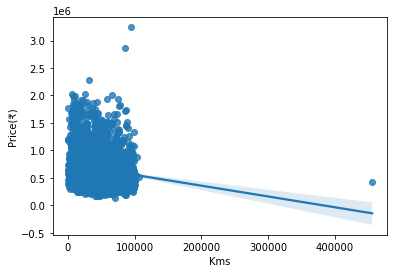

In [60]:
sns.regplot(x='Kms',y='Price(₹)', data = df)

### Linear regression will not be a good model for the given dataset

In [61]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [62]:
#param_grid = [{'kernel':['rbf','linear']}]
#gsv = GridSearchCV(regressor,param_grid,cv=10)
#gsv.fit(X_train,y_train)

In [63]:
#regressor = SVR(kernel='linear')

In [64]:
#regressor.fit(X_train,y_train)

In [66]:
pickle.dump(model,open('dt_model.pkl','wb'))

In [67]:
pickled_model = pickle.load(open('dt_model.pkl','rb'))

In [68]:
pickled_model.predict(X_test)

array([ 844799.,  604499.,  812899.,  959749.,  430299.,  292799.,
        423399.,  676199.,  251299.,  725599.,  331899.,  510199.,
        925149.,  607599.,  643399.,  843399.,  303399.,  691899.,
        358999.,  293599.,  432799.,  896699.,  730499.,  368899.,
        539299.,  322899.,  375699.,  447849.,  798899.,  890599.,
        989499.,  439099., 1166799.,  459999.,  502199.,  314349.,
        666999., 1736699.,  637099.,  362049.,  487099.,  433999.,
        284899.,  993099.,  540199.,  489599.,  435499.,  654899.,
        516199.,  699899.,  404599.,  617499.,  592399.,  537699.,
        867299., 1103599.,  345699.,  478799.,  228299.,  636499.,
        451199.,  577499.,  522799., 1011399.,  660499.,  877899.,
        492399.,  536899., 1274199.,  643399.,  873299., 1479999.,
        400299.,  522899.,  640299.,  645099.,  214999.,  660399.,
       1071899.,  372799.,  339499.,  582099., 1605999., 1338599.,
        552299.,  559699.,  550999.,  580499.,  490449.,  6388

In [70]:
pickled_model.score(X_test,y_test)*100

99.97514266225646

In [84]:
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}